# DST Index Visualizations & Insights

### a) Loading the csv file('DST(Time-Series Format).csv') in dataframe

In [1]:
import pandas as pd
# Import figure from bokeh.plotting
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
# Import output_file and show from bokeh.io
from bokeh.io import output_file,show
df=pd.read_csv('DST(Time-Series Format).csv')


### b) Setting the index value as datetime and dropping unnecessary datetime column

In [2]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.index=df['Datetime']
df=df.drop('Datetime',axis=1)

### c) Describes the loaded DSt Index Value in Detail

In [3]:
df.describe()

,DST Index
count,378360.000000
mean,-15.501546
std,22.891855
min,-589.000000
25%,-24.000000
50%,-11.000000
75%,-2.000000
max,81.000000


After describing the data in detail ,we noticed that the mean & mode of the data is below 0 i.e  mostly the DST Index value is -ve over the time span.Apart from that the 25,50 and 75 percentile data is also -ve . So more than 75% of data is -ve

### d) Describes the top 5 rows of the dataset

In [4]:
df.head()

,DST Index
Datetime,
1975-01-01 00:00:00,-7.0
1975-01-01 01:00:00,-9.0
1975-01-01 02:00:00,-10.0
1975-01-01 03:00:00,-11.0
1975-01-01 04:00:00,-12.0


### e) Plotting the graph of DST Index

Seeing the graph , we can see that the Data is not showing any particular type of pattern and is a Stochastic time series where the DST index is dependent on various natural factors.

In [5]:
from bokeh.plotting import figure, gridplot, output_file, show

output_file("DST_Index.html")
s1 = figure(x_axis_type='datetime',x_axis_label='Date', y_axis_label='DST',width=1000, plot_height=500, title=None)
s1.line(df.index,df['DST Index'])
p = gridplot([[s1]])
show(p)

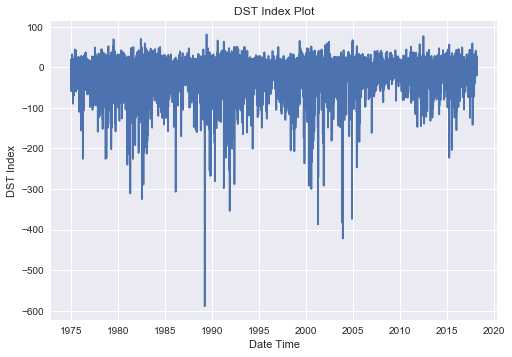

In [6]:
import matplotlib.pyplot as pltt
import seaborn; 
seaborn.set()
pltt.xlabel('Date Time')
pltt.ylabel('DST Index')
pltt.title('DST Index Plot')
pltt.plot(df['DST Index']);
pltt.show()

### f) Smoothening: Applying Rolling Mean

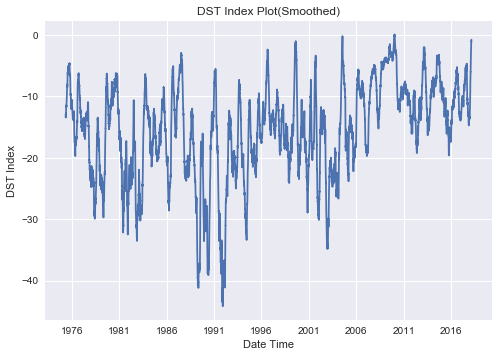

In [7]:
import matplotlib.pyplot as plt
rolling_mean=df['DST Index'].rolling(window=3000).mean()
plt.xlabel('Date Time')
plt.ylabel('DST Index')
plt.title('DST Index Plot(Smoothed)')
plt.plot(rolling_mean)
plt.show()

Since the data was pretty dense ,so we took a rolling mean considering a window of 3000 which is approximately equal to (125*24) i.e One third of a year

### g) Plotting the Original & Smoothed Graph

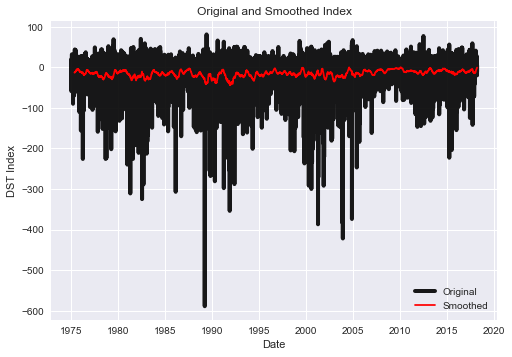

In [8]:
import matplotlib.pyplot as pltt
fig=pltt.figure();
ax=fig.add_subplot(111);
ax.plot(df['DST Index'],color=(0,0,0),linewidth=4,alpha=0.9,label='Original')
ax.plot(rolling_mean,color=(1,0,0),label='Smoothed')
ax.set_title('Original and Smoothed Index')
ax.set_xlabel('Date')
ax.set_ylabel('DST Index')
ax.legend(loc='lower right')
pltt.show()

On plotting the smooothed graph over the original one , we can see that it takes a narrow range which is near to 0

### h) Indexed the rows and named it as 'Ticks'

In [9]:
df1=pd.DataFrame()
df1['Ticks']=range(0,len(df.index.values))

### i) Fitting a Linear Model 

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(df1[['Ticks']],df[['DST Index']])
m=model.coef_[0]
b=model.intercept_
print('y = ',round(m[0],5),'x + ',round(b[0],2))

y =  3e-05 x +  -20.54


Fitting a linear model we note that the the slope come to be very small which is near to 0 ,so it predicts the value of DST Index to be aroud -20 which is quite near to our mean value we got above

In [11]:
predictions=model.predict(df1[['Ticks']])
predictions[0:5]

array([[-20.53950425],
       [-20.53947762],
       [-20.53945099],
       [-20.53942436],
       [-20.53939773]])

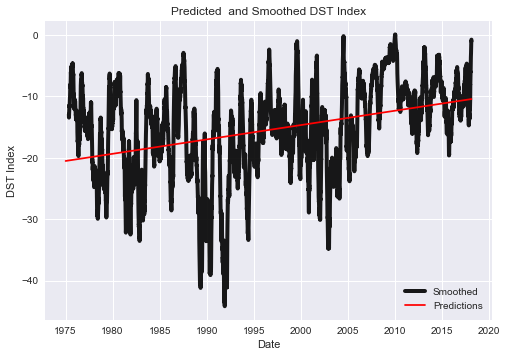

In [12]:
fig=pltt.figure();
ax1=fig.add_subplot(111);
ax1.plot(df.index,rolling_mean,color=(0,0,0),linewidth=4,alpha=0.9,label='Smoothed')
ax1.plot(df.index,predictions,color=(1,0,0),label='Predictions')
ax1.set_title('Predicted  and Smoothed DST Index')
ax1.set_xlabel('Date')
ax1.set_ylabel('DST Index')
ax1.legend(loc='lower right')
plt.show()

### j)Smoothening Techniques

### 1)Taking Daily Mean

In [13]:
daily_mean=df.resample('D').mean()

In [14]:
daily_mean

,DST Index
Datetime,
1975-01-01,-8.833333
1975-01-02,-1.500000
1975-01-03,7.416667
1975-01-04,-10.583333
1975-01-05,-19.375000
1975-01-06,-12.666667
1975-01-07,-34.416667
1975-01-08,-15.750000
1975-01-09,-17.666667


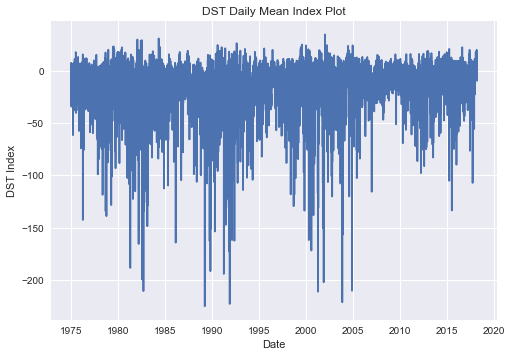

In [15]:
import matplotlib.pyplot as plt1
import seaborn; seaborn.set()
plt1.plot(daily_mean)
plt1.xlabel('Date')
plt1.ylabel('DST Index')
plt1.title('DST Daily Mean Index Plot')
plt1.show()


### 2)Taking Daily Sum

In [16]:
daily_sum=df.resample('D').sum()

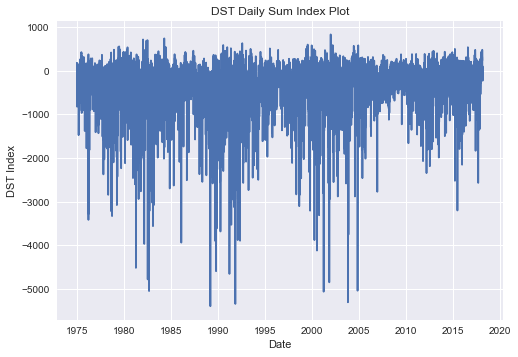

In [17]:
import matplotlib.pyplot as plt2
import seaborn; seaborn.set()
plt2.plot(daily_sum)
plt2.xlabel('Date')
plt2.ylabel('DST Index')
plt2.title('DST Daily Sum Index Plot')
plt2.show()


### 3) Taking Weekly Mean

In [18]:
weekly_mean=df.resample('W').mean() 

In [19]:
weekly_mean

,DST Index
Datetime,
1975-01-05,-6.575000
1975-01-12,-15.803571
1975-01-19,-20.684524
1975-01-26,-5.154762
1975-02-02,-4.803571
1975-02-09,-7.720238
1975-02-16,-24.220238
1975-02-23,-11.083333
1975-03-02,-9.303571


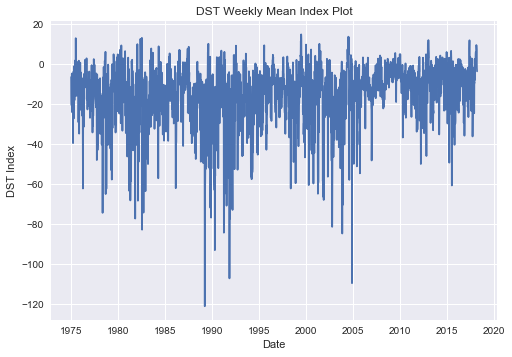

In [20]:
import matplotlib.pyplot as plt3
import seaborn; seaborn.set()
plt3.plot(weekly_mean)
plt3.xlabel('Date')
plt3.ylabel('DST Index')
plt3.title('DST Weekly Mean Index Plot')
plt3.show()


### 4) Taking Monthly Mean

In [21]:
monthly_mean=df.resample('M').mean()

In [22]:
monthly_mean

,DST Index
Datetime,
1975-01-31,-10.440860
1975-02-28,-13.421131
1975-03-31,-18.158602
1975-04-30,-10.405556
1975-05-31,-6.303763
1975-06-30,0.487500
1975-07-31,-6.967742
1975-08-31,-9.021505
1975-09-30,-4.201389


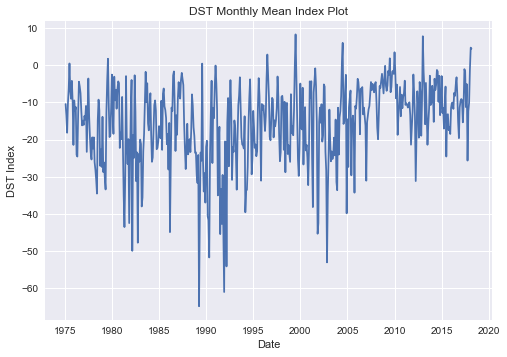

In [23]:
import matplotlib.pyplot as plt4
import seaborn; seaborn.set()
plt4.plot(monthly_mean)
plt4.xlabel('Date')
plt4.ylabel('DST Index')
plt4.title('DST Monthly Mean Index Plot')
plt4.show()


### 5) Taking Monthly Sum

In [24]:
monthly_sum=df.resample('M').sum()

In [25]:
monthly_sum

,DST Index
Datetime,
1975-01-31,-7768.0
1975-02-28,-9019.0
1975-03-31,-13510.0
1975-04-30,-7492.0
1975-05-31,-4690.0
1975-06-30,351.0
1975-07-31,-5184.0
1975-08-31,-6712.0
1975-09-30,-3025.0


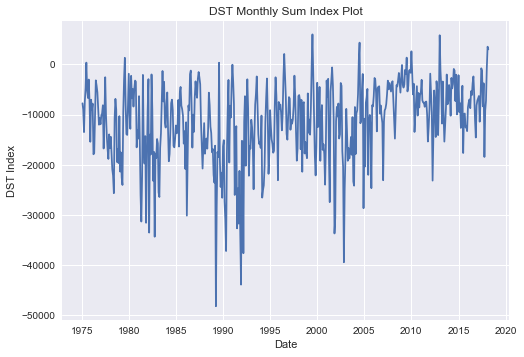

In [26]:
import matplotlib.pyplot as plt5
import seaborn; seaborn.set()
plt5.plot(monthly_sum)
plt5.xlabel('Date')
plt5.ylabel('DST Index')
plt5.title('DST Monthly Sum Index Plot')
plt5.show()


### 6) Taking Annual Mean

In [27]:
annual_mean=df.resample('A').mean()

In [28]:
annual_mean

,DST Index
Datetime,
1975-12-31,-9.917922
1976-12-31,-13.535291
1977-12-31,-16.969064
1978-12-31,-22.120776
1979-12-31,-16.334589
1980-12-31,-11.489526
1981-12-31,-24.372831
1982-12-31,-23.505023
1983-12-31,-17.085616


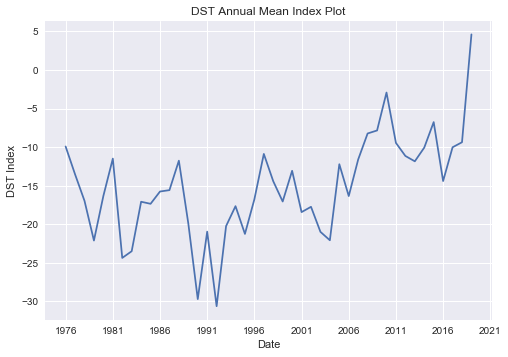

In [29]:
import matplotlib.pyplot as plt7
import seaborn; seaborn.set()
plt7.plot(annual_mean)
plt7.xlabel('Date')
plt7.ylabel('DST Index')
plt7.title('DST Annual Mean Index Plot')
plt7.show()

### 7) Taking Annual Sum

In [30]:
annual_sum=df.resample('A').sum()

In [31]:
annual_sum

,DST Index
Datetime,
1975-12-31,-86881.0
1976-12-31,-118894.0
1977-12-31,-148649.0
1978-12-31,-193778.0
1979-12-31,-143091.0
1980-12-31,-100924.0
1981-12-31,-213506.0
1982-12-31,-205904.0
1983-12-31,-149670.0


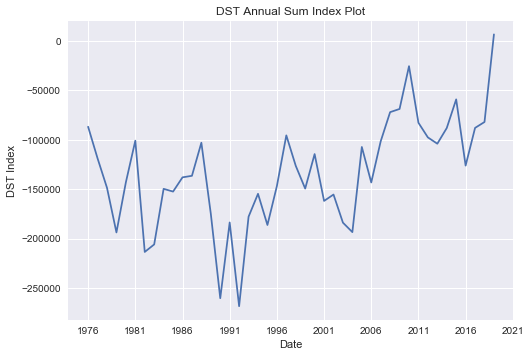

In [32]:
import matplotlib.pyplot as plt8
import seaborn; seaborn.set()
plt8.plot(annual_sum)
plt8.xlabel('Date')
plt8.ylabel('DST Index')
plt8.title('DST Annual Sum Index Plot')
plt8.show()


### k)Combining all the Means Together

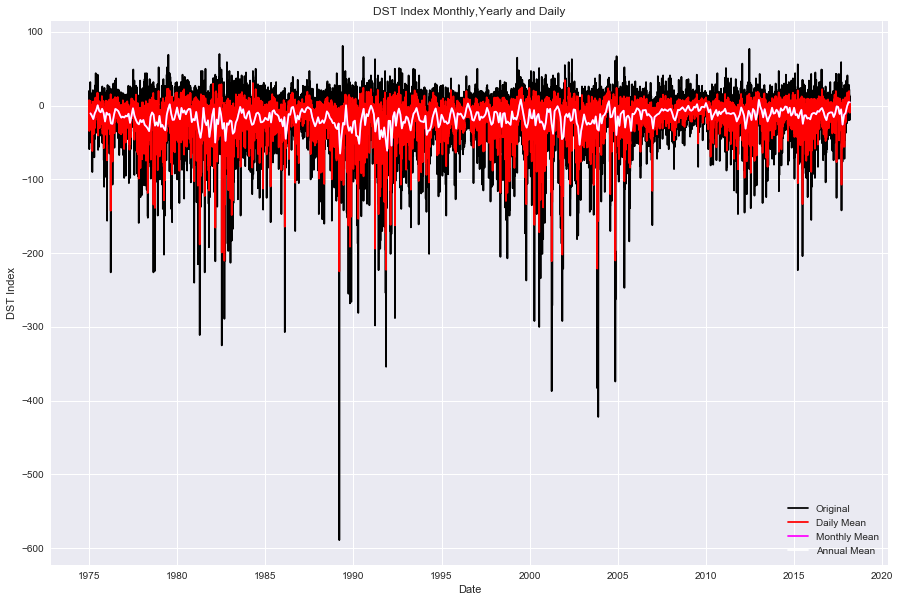

In [33]:
fig=pltt.figure(figsize=(15,10));
ax1=fig.add_subplot(111);
ax1.plot(df['DST Index'],color=(0,0,0),label='Original')
ax1.plot(daily_mean,color=(1,0,0),label='Daily Mean')
ax1.plot(monthly_mean,color=(1,0,1),label='Monthly Mean')
ax1.plot(monthly_mean,color=(1,1,1),label='Annual Mean')
ax1.set_title('DST Index Monthly,Yearly and Daily')
ax1.set_xlabel('Date')
ax1.set_ylabel('DST Index')
ax1.legend(loc='lower right')
pltt.show()

### l)Combining only the Annual Mean and Original PlotsTogether

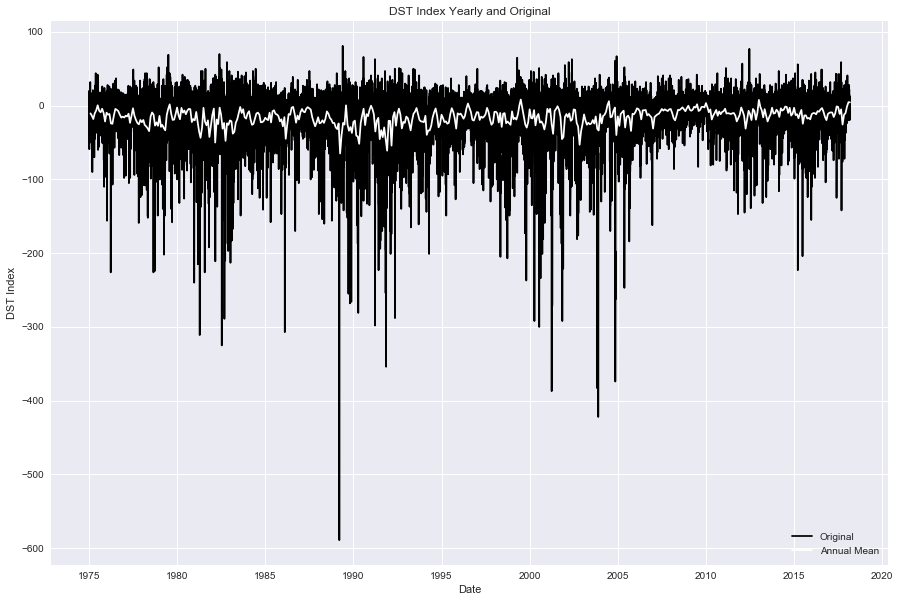

In [34]:
fig=pltt.figure(figsize=(15,10));
ax1=fig.add_subplot(111);
ax1.plot(df['DST Index'],color=(0,0,0),label='Original')
ax1.plot(monthly_mean,color=(1,1,1),label='Annual Mean')
ax1.set_title('DST Index Yearly and Original')
ax1.set_xlabel('Date')
ax1.set_ylabel('DST Index')
ax1.legend(loc='lower right')
pltt.show()

### m) Plotting all the months of 2017 Together

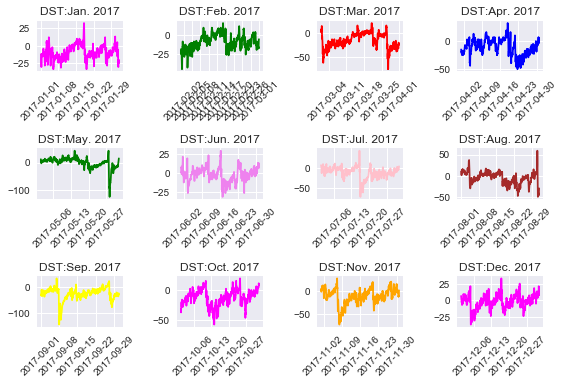

In [35]:

view_Jan_2017=df['2017-01']

plt.subplot(3,4,1)
plt.plot(view_Jan_2017,color='magenta')
plt.title('DST:Jan. 2017')
plt.xticks(rotation=45)


view_Feb_2017=df['2017-02']


plt.subplot(3,4,2)
plt.plot(view_Feb_2017,color='green')
plt.title('DST:Feb. 2017')
plt.xticks(rotation=45)


view_Mar_2017=df['2017-03']


plt.subplot(3,4,3)
plt.plot(view_Mar_2017,color='red')
plt.title('DST:Mar. 2017')
plt.xticks(rotation=45)

view_Apr_2017=df['2017-04']

plt.subplot(3,4,4)
plt.plot(view_Apr_2017,color='blue')
plt.title('DST:Apr. 2017')
plt.xticks(rotation=45)


view_May_2017=df['2017-05']


plt.subplot(3,4,5)
plt.plot(view_May_2017,color='green')
plt.title('DST:May. 2017')
plt.xticks(rotation=45)


view_Jun_2017=df['2017-06']


plt.subplot(3,4,6)
plt.plot(view_Jun_2017,color='violet')
plt.title('DST:Jun. 2017')
plt.xticks(rotation=45)


view_Jul_2017=df['2017-07']


plt.subplot(3,4,7)
plt.plot(view_Jul_2017,color='pink')
plt.title('DST:Jul. 2017')
plt.xticks(rotation=45)


view_Aug_2017=df['2017-08']


plt.subplot(3,4,8)
plt.plot(view_Aug_2017,color='brown')
plt.title('DST:Aug. 2017')
plt.xticks(rotation=45)

view_Sep_2017=df['2017-09']

plt.subplot(3,4,9)
plt.plot(view_Sep_2017,color='yellow')
plt.title('DST:Sep. 2017')
plt.xticks(rotation=45)

view_Oct_2017=df['2017-10']

plt.subplot(3,4,10)
plt.plot(view_Oct_2017,color='magenta')
plt.title('DST:Oct. 2017')
plt.xticks(rotation=45)


view_Nov_2017=df['2017-11']


plt.subplot(3,4,11)
plt.plot(view_Nov_2017,color='orange')
plt.title('DST:Nov. 2017')
plt.xticks(rotation=45)


view_Dec_2017=df['2017-12']


plt.subplot(3,4,12)
plt.plot(view_Dec_2017,color='magenta')
plt.title('DST:Dec. 2017')
plt.xticks(rotation=45)

# Improve spacing and display the plot
plt.tight_layout()

plt.rcParams["figure.figsize"] = (50,50)
plt.show()

### n) Plotting for months of 2018

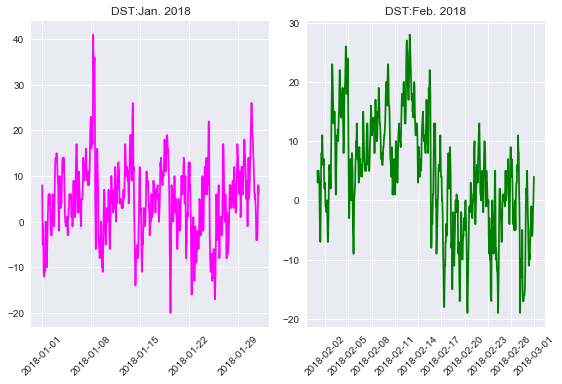

In [36]:
import seaborn; 
seaborn.set()
# Slice aapl from Jan. 2018 to Feb. 2018 inclusive: view
view_Jan_2017=df['2018-01']

plt.subplot(1,2,1)
plt.plot(view_Jan_2017,color='magenta')
plt.title('DST:Jan. 2018')
plt.xticks(rotation=45)

# Slice aapl for Feb. 2018 inclusive: view
view_Feb_2017=df['2018-02']

# Plot the sliced series in the top subplot in red
plt.subplot(1,2,2)
plt.plot(view_Feb_2017,color='green')
plt.title('DST:Feb. 2018')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### o) LagPlot

C:\Users\Subham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


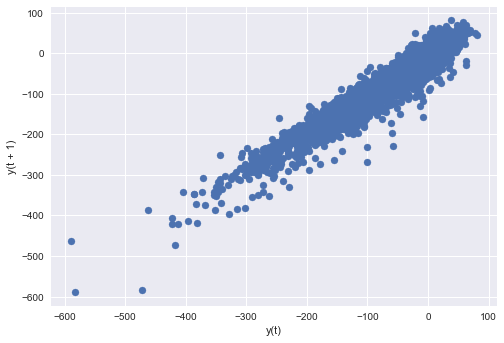

In [37]:
from pandas.tools.plotting import lag_plot
lag_plot(df)
plt.show()

### p) Creating a Series Dataset from year 2000 to 2018

In [38]:
df_sample=pd.read_csv('DST(Time-Series Format).csv')
df_sample['Datetime'] = pd.to_datetime(df_sample['Datetime'])
df_sample.index=df_sample['Datetime']
df_sample=df_sample.drop('Datetime',axis=1)
df_sample=df_sample['2000':'2018']
df_sample.to_csv('sample.csv')

### q) DST Index Yearly Line Plots from 2000 to 2018

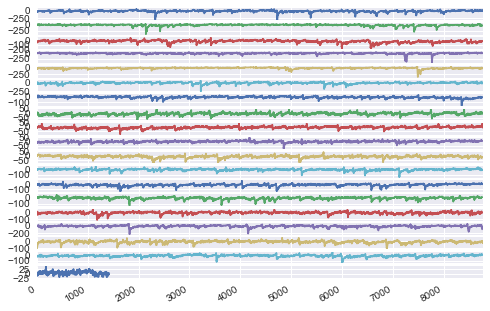

In [39]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
series = Series.from_csv('sample.csv', header=0)
groups =series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = Series(group.values)
years.plot(subplots=True, legend=False)
plt.rcParams["figure.figsize"] = (40,40)
plt.show()

### r) DST Index Box Plots from 2000 to 2018

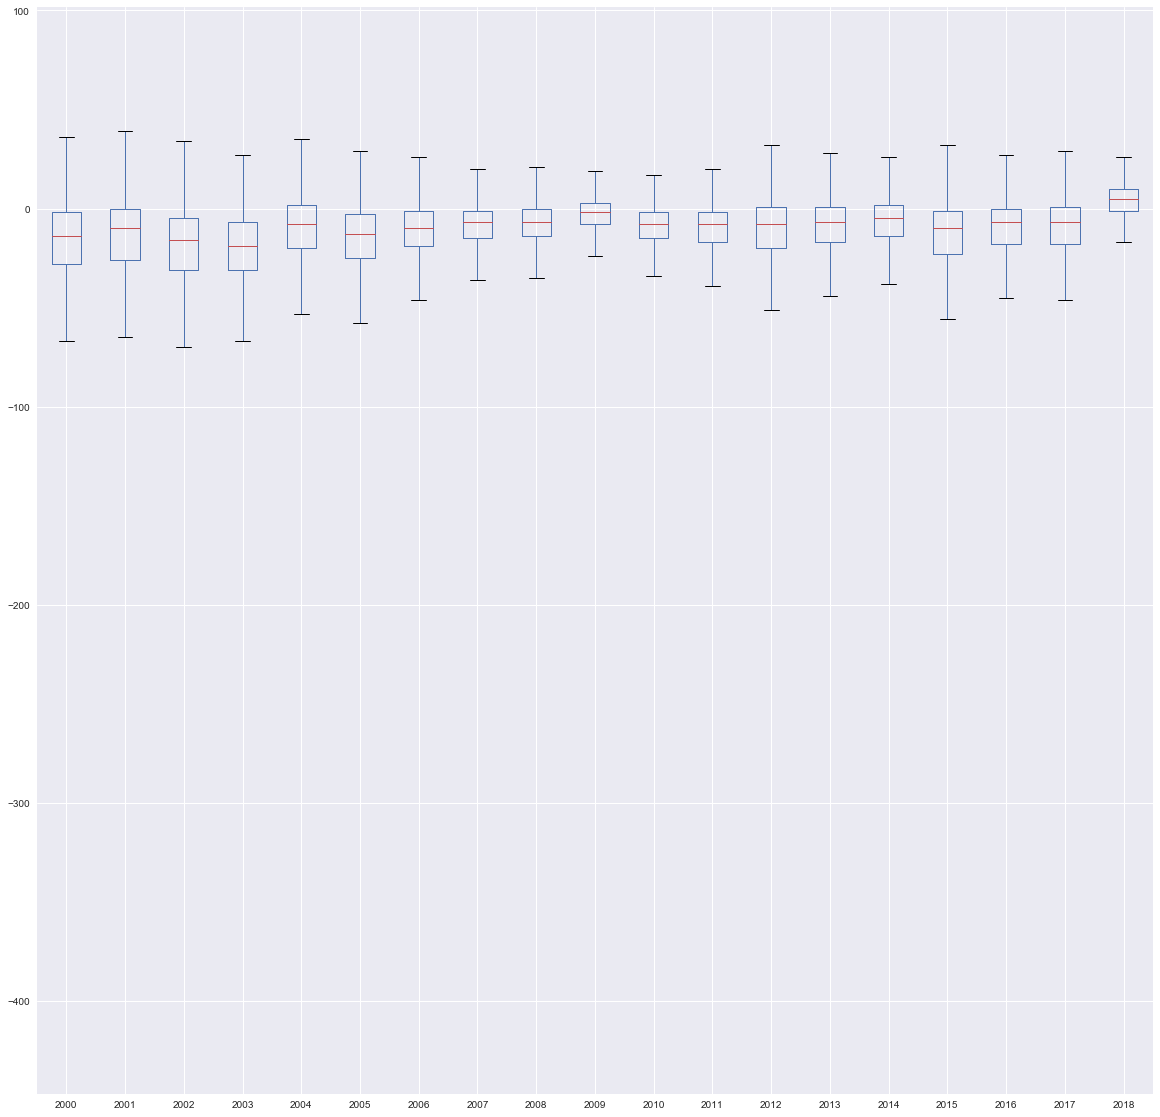

In [40]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot as plt
series = Series.from_csv('sample.csv', header=0)
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = pd.Series(group.values)
years.boxplot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()


### s) DST Index Autocorrelation Plots from 2000 to 2018

C:\Users\Subham\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


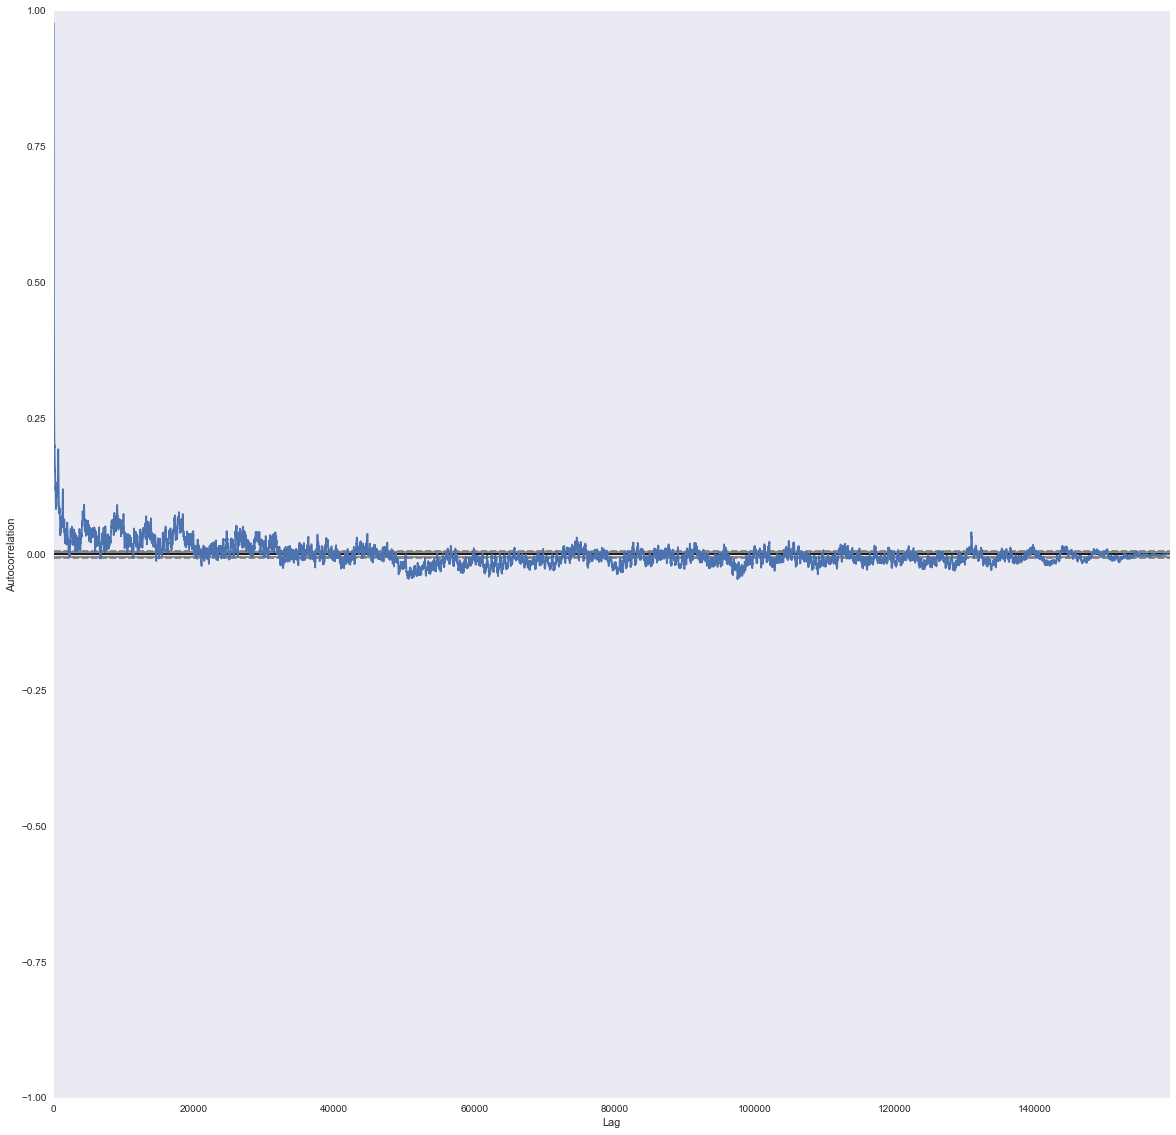

In [41]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
series = Series.from_csv('sample.csv', header=0)

autocorrelation_plot(series)
pyplot.show()

### t) DST Index Lag Plot from 2000 to 2018

C:\Users\Subham\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """


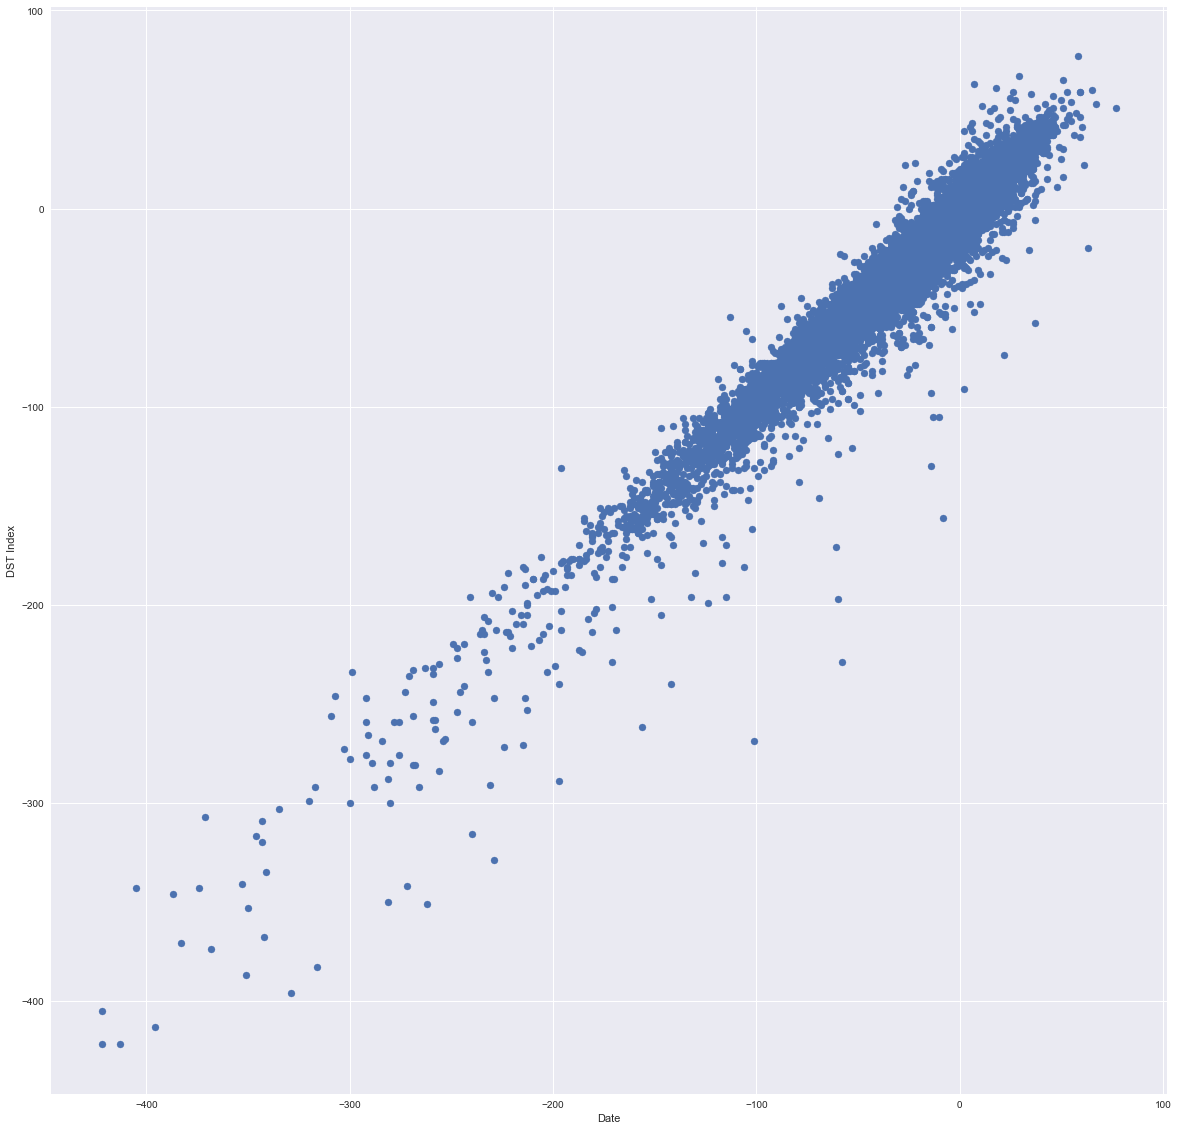

In [42]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
series = Series.from_csv('sample.csv', header=0)
lag_plot(series)
pyplot.xlabel('Date')
pyplot.ylabel('DST Index')
pyplot.show()

### t) DST Index Box Plots for year 2017

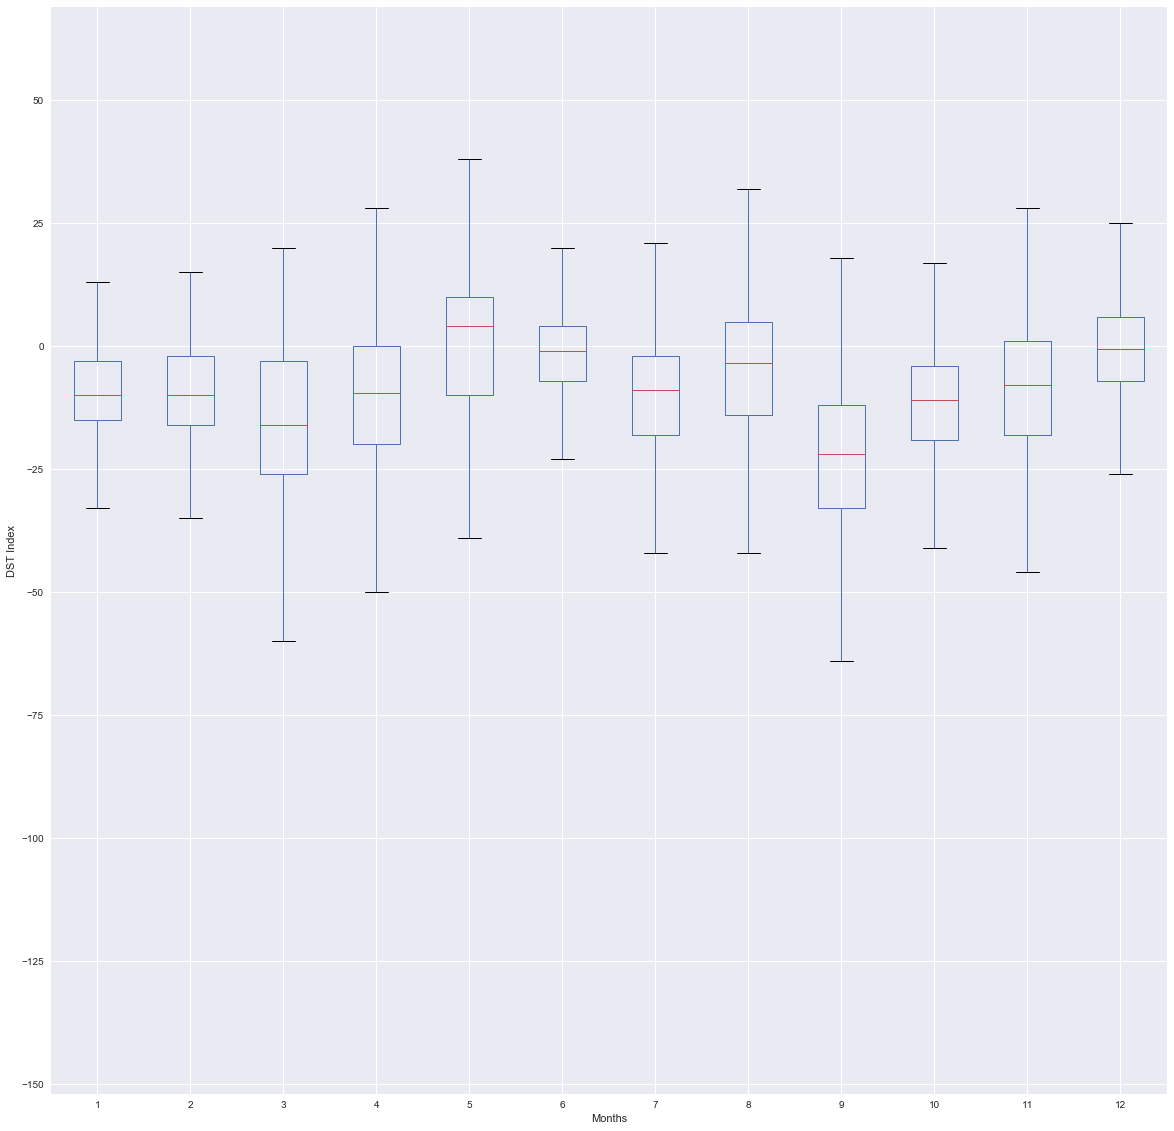

In [43]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
from pandas import concat
series = Series.from_csv('sample.csv', header=0)
one_year = series['2017']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.xlabel('Months')
pyplot.ylabel('DST Index')
months.boxplot()
pyplot.show()

### u) DST Index Box Plots for year 2018

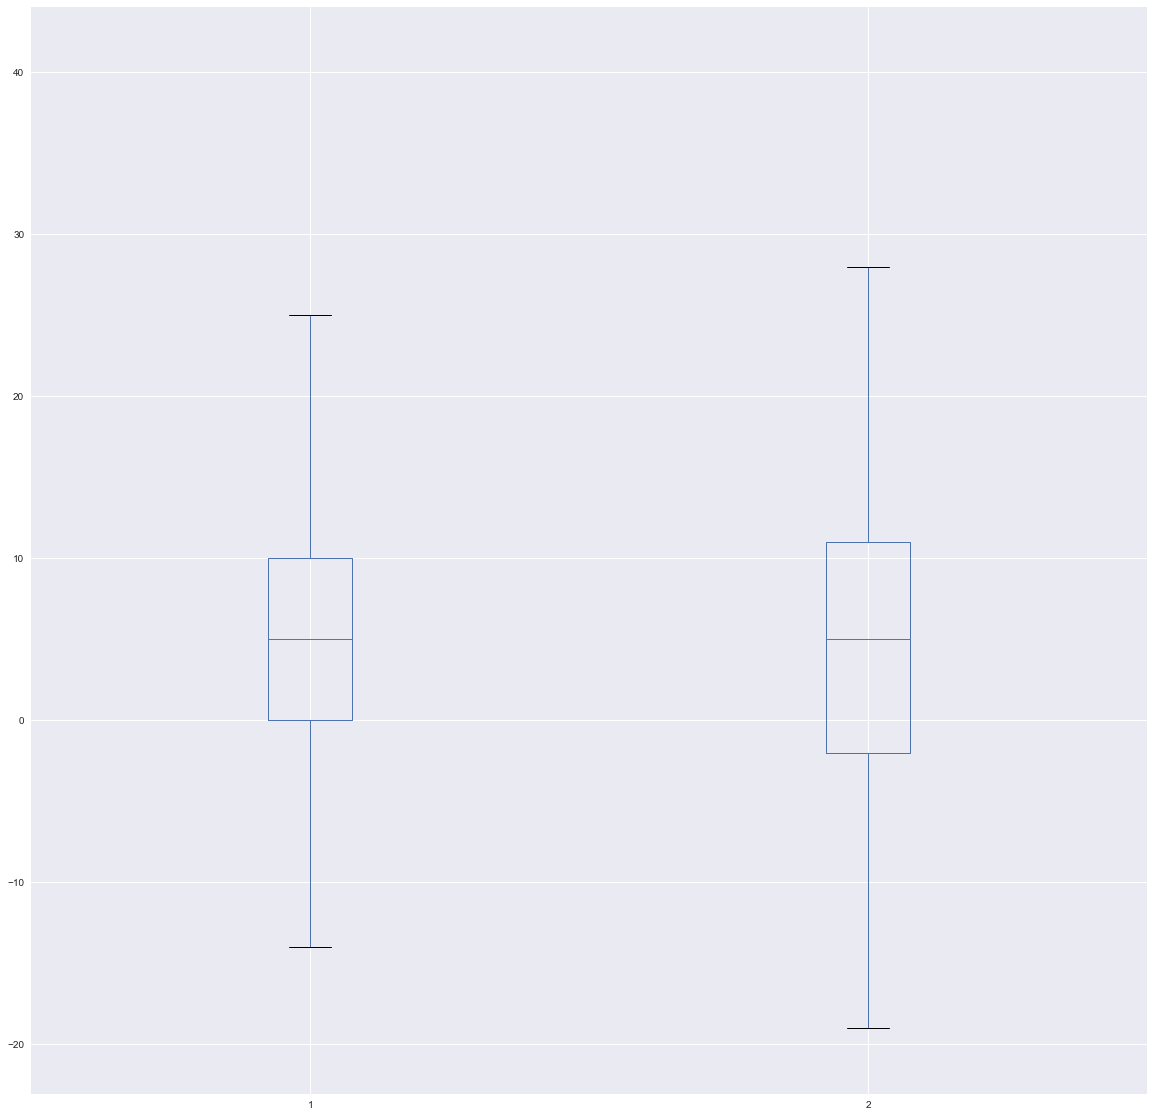

In [44]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
from pandas import concat
series = Series.from_csv('sample.csv', header=0)
one_year = series['2018']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,3)
months.boxplot()
pyplot.show()

### v) DST Index Bar Plot for year 2017 to 2018

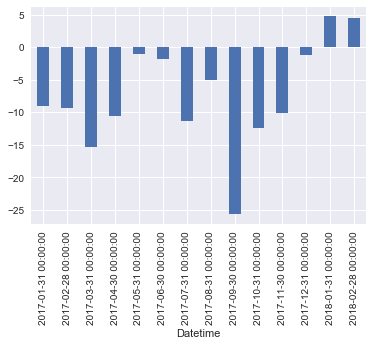

In [45]:
%matplotlib inline
view=df['2017':'2018']
view['DST Index'].resample('M').mean().plot(kind='bar')


### w) DST Index Index Plot for year 2017 to 2018

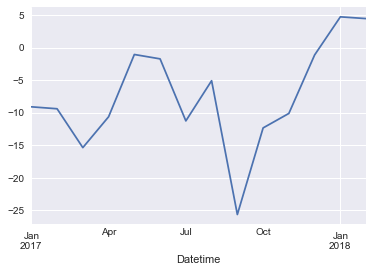

In [46]:
%matplotlib inline
view=df['2017':'2018']
view['DST Index'].resample('M').mean().plot()

### x) DST Index Histogram and Density Plots

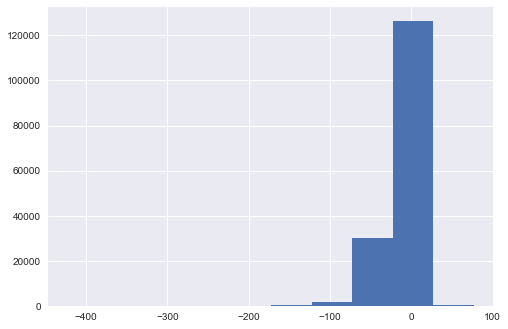

In [47]:
from pandas import Series
from matplotlib import pyplot as p
import seaborn; 
seaborn.set()
series = Series.from_csv('sample.csv', header=0)
series.hist()
p.show()

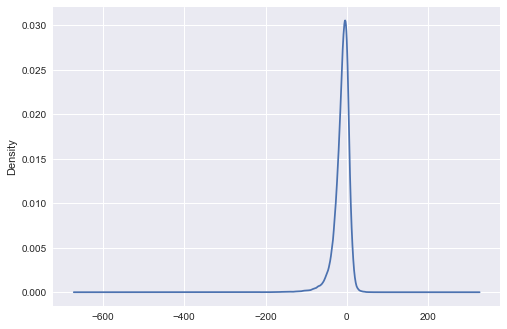

In [48]:
from pandas import Series
import seaborn; 
seaborn.set()
from matplotlib import pyplot
series = Series.from_csv('sample.csv', header=0)
series.plot(kind='kde')
pyplot.show()

### y)Time Series Decomposition

C:\Users\Subham\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


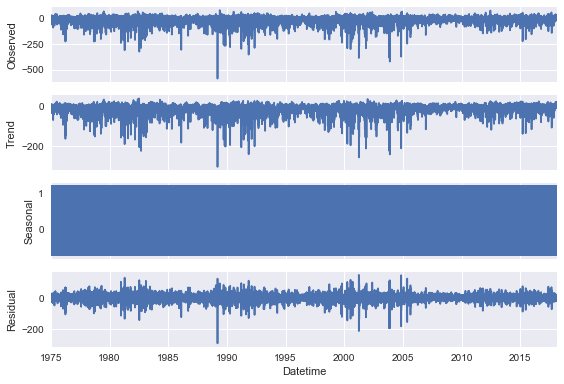

In [49]:
import statsmodels.api as sm
import io
res=sm.tsa.seasonal_decompose(df['DST Index'])
resplot=res.plot()